In [11]:
%%javascript
require.config({ 
    paths: { 
    d3: 'https://d3js.org/d3.v7.min'
}});

require(["d3"], function(d3) {
    window.d3 = d3;
});

<IPython.core.display.Javascript object>

In [12]:
import sparg
import tskit
import msprime
import numpy as np
import tskit_arg_visualizer as viz
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("always")

In [13]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(time=1, flags=0)  # Node 4
node_table.add_row(time=2, flags=0)  # Node 5
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 6
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 7
node_table.add_row(time=4, flags=0)  # Node 8
node_table.add_row(time=5, flags=0)  # Node 9

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=4, child=0)
edge_table.add_row(left=0, right=1e3, parent=4, child=1)
edge_table.add_row(left=0, right=1e3, parent=5, child=2)
edge_table.add_row(left=0, right=1e3, parent=5, child=4)
edge_table.add_row(left=0, right=500, parent=6, child=3)
edge_table.add_row(left=500, right=1e3, parent=7, child=3)
edge_table.add_row(left=0, right=1e3, parent=8, child=5)
edge_table.add_row(left=0, right=500, parent=8, child=6)
edge_table.add_row(left=500, right=1e3, parent=9, child=7)
edge_table.add_row(left=500, right=1e3, parent=9, child=8)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3]}

viz.D3ARG(ts=ts).draw(edge_type="ortho")

In [14]:
sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

(array([[0.554954954954955]], dtype=object),
 array([[5., 4., 3., 1., 0.],
        [4., 5., 3., 1., 0.],
        [3., 3., 5., 1., 0.],
        [1., 1., 1., 5., 3.],
        [0., 0., 0., 3., 5.]]),
 [[0, 4, 5, 8, 9], [1, 4, 5, 8, 9], [2, 5, 8, 9], [3, 6, 8, 9], [3, 7, 9]])

In [15]:
ts_chopped_4 = ts.decapitate(4)
viz.D3ARG(ts=ts_chopped_4).draw()

In [16]:
sparg.estimate_spatial_parameters(ts=ts_chopped_4, locations_of_individuals=node_locations)

(array([[0.822916666666667]], dtype=object),
 array([[4., 3., 2., 0., 0.],
        [3., 4., 2., 0., 0.],
        [2., 2., 4., 0., 0.],
        [0., 0., 0., 4., 3.],
        [0., 0., 0., 3., 4.]]),
 [[0, 4, 5, 8], [1, 4, 5, 8], [2, 5, 8], [3, 6, 8], [3, 7, 10]])

In [17]:
ts_subset_4 = ts.subset(nodes=list(range(8+1)))
viz.D3ARG(ts=ts_subset_4).draw()

In [18]:
sparg.estimate_spatial_parameters(ts=ts_subset_4, locations_of_individuals=node_locations)

(array([[0.822916666666667]], dtype=object),
 array([[4., 3., 2., 0., 0.],
        [3., 4., 2., 0., 0.],
        [2., 2., 4., 0., 0.],
        [0., 0., 0., 4., 3.],
        [0., 0., 0., 3., 3.]]),
 [[0, 4, 5, 8], [1, 4, 5, 8], [2, 5, 8], [3, 6, 8], [3, 7]])

In [19]:
ts_chopped_3 = ts.decapitate(3)
viz.D3ARG(ts=ts_chopped_3).draw()

In [20]:
sparg.estimate_spatial_parameters(ts=ts_chopped_3, locations_of_individuals=node_locations)

Multiple solutions to system of linear equations in root location calculation.


/Users/jameskitchens/Documents/GitHub/sparg2.0/sparg/main.py:204: UserWarning: Multiple solutions to system of linear equations in root location calculation.
  warnings.warn("Multiple solutions to system of linear equations in root location calculation.")


(array([[1.95499738356881]], dtype=object),
 array([[3., 2., 1., 0., 0.],
        [2., 3., 1., 0., 0.],
        [1., 1., 3., 0., 0.],
        [0., 0., 0., 3., 3.],
        [0., 0., 0., 3., 3.]]),
 [[0, 4, 5, 10], [1, 4, 5, 10], [2, 5, 10], [3, 6], [3, 7]])

In [21]:
ts_subset_3 = ts.subset(nodes=list(range(7+1)))
viz.D3ARG(ts=ts_subset_3).draw()

In [22]:
sparg.estimate_spatial_parameters(ts=ts_subset_3, locations_of_individuals=node_locations)

Multiple solutions to system of linear equations in root location calculation.


/Users/jameskitchens/Documents/GitHub/sparg2.0/sparg/main.py:204: UserWarning: Multiple solutions to system of linear equations in root location calculation.
  warnings.warn("Multiple solutions to system of linear equations in root location calculation.")


(array([[1.14285714285714]], dtype=object),
 array([[2., 1., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [0., 0., 2., 0., 0.],
        [0., 0., 0., 3., 3.],
        [0., 0., 0., 3., 3.]]),
 [[0, 4, 5], [1, 4, 5], [2, 5], [3, 6], [3, 7]])

In [23]:
ts_subset_3_filtered, maps = sparg.remove_useless_nodes(ts=ts_subset_3)
viz.D3ARG(ts=ts_subset_3_filtered).draw()

In [32]:
sparg.estimate_spatial_parameters(ts=ts_subset_3_filtered, locations_of_individuals=node_locations)

/Users/jameskitchens/Documents/GitHub/sparg2.0/sparg/main.py:203: UserWarning: Multiple solutions to system of linear equations in root location calculation.
  warnings.warn("Multiple solutions to system of linear equations in root location calculation.")


(array([[1.33333333333333]], dtype=object),
 array([[2., 1., 0., 0.],
        [1., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 0.]]),
 [[0, 4, 5], [1, 4, 5], [2, 5], [3]])

In [33]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=4)  # Node 4
node_table.add_row(time=1, flags=0)  # Node 5
node_table.add_row(time=2, flags=0)  # Node 6
node_table.add_row(time=3, flags=0)  # Node 7
node_table.add_row(time=4, flags=msprime.NODE_IS_RE_EVENT)  # Node 8
node_table.add_row(time=4, flags=msprime.NODE_IS_RE_EVENT)  # Node 9
node_table.add_row(time=5, flags=0)  # Node 10
node_table.add_row(time=6, flags=0)  # Node 11

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=5, child=0)
edge_table.add_row(left=0, right=1e3, parent=5, child=1)
edge_table.add_row(left=0, right=1e3, parent=6, child=3)
edge_table.add_row(left=0, right=1e3, parent=6, child=4)
edge_table.add_row(left=0, right=1e3, parent=7, child=2)
edge_table.add_row(left=0, right=1e3, parent=7, child=5)
edge_table.add_row(left=0, right=500, parent=8, child=6)
edge_table.add_row(left=500, right=1e3, parent=9, child=6)
edge_table.add_row(left=0, right=1e3, parent=10, child=7)
edge_table.add_row(left=0, right=500, parent=10, child=8)
edge_table.add_row(left=500, right=1e3, parent=11, child=9)
edge_table.add_row(left=0, right=1e3, parent=11, child=10)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3], 4:[4]}

viz.D3ARG(ts=ts).draw(edge_type="ortho")

In [34]:
ts_subset_3 = ts.subset(nodes=list(range(7+1)))
viz.D3ARG(ts=ts_subset_3).draw()

In [35]:
sparg.estimate_spatial_parameters(ts=ts_subset_3, locations_of_individuals=node_locations)

(array([[0.386363636363636]], dtype=object),
 array([[3., 2., 0., 0., 0.],
        [2., 3., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 2., 0.],
        [0., 0., 0., 0., 2.]]),
 [[0, 5, 7], [1, 5, 7], [2, 7], [3, 6], [4, 6]])

In [36]:
ts_subset_4 = ts.subset(nodes=list(range(9+1)))
viz.D3ARG(ts=ts_subset_4).draw()

In [37]:
sparg.estimate_spatial_parameters(ts=ts_subset_4, locations_of_individuals=node_locations)

(array([[0.579545454545455]], dtype=object),
 array([[3., 2., 0., 0., 0., 0., 0.],
        [2., 3., 0., 0., 0., 0., 0.],
        [0., 0., 3., 0., 0., 0., 0.],
        [0., 0., 0., 4., 2., 4., 2.],
        [0., 0., 0., 2., 4., 2., 4.],
        [0., 0., 0., 4., 2., 4., 2.],
        [0., 0., 0., 2., 4., 2., 4.]]),
 [[0, 5, 7], [1, 5, 7], [2, 7], [3, 6, 8], [4, 6, 8], [3, 6, 9], [4, 6, 9]])

In [38]:
dispersal_rate, cov_mat, paths, locations, variances = sparg.estimate_spatial_parameters(ts=ts_subset_4, locations_of_individuals=node_locations, return_ancestral_node_positions=[0,1,2,3,4,5,6,7,8,9])

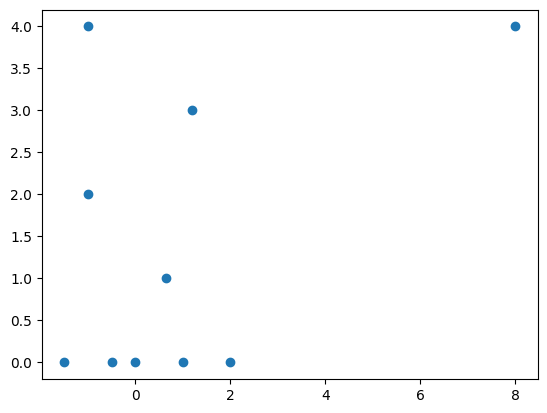

In [39]:
times = []
locs = []
for node in locations:
    times.append(ts.node(node).time)
    locs.append(locations[node])
plt.scatter(locs, times)
plt.show()

In [40]:
ts_left_tree = ts.subset(nodes=[0,1,2,5,7])
viz.D3ARG(ts=ts_left_tree).draw()

In [41]:
sparg.estimate_spatial_parameters(ts=ts_left_tree, locations_of_individuals=node_locations)

(array([[0.454545454545454]], dtype=object),
 array([[3., 2., 0.],
        [2., 3., 0.],
        [0., 0., 3.]]),
 [[0, 3, 4], [1, 3, 4], [2, 4]])

In [42]:
ts_right_tree = ts.subset(nodes=[3,4,6])
viz.D3ARG(ts=ts_right_tree).draw()

In [43]:
sparg.estimate_spatial_parameters(ts=ts_right_tree, locations_of_individuals=node_locations)

(array([[0.250000000000000]], dtype=object),
 array([[2., 0.],
        [0., 2.]]),
 [[0, 2], [1, 2]])

In [44]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(time=1, flags=0)  # Node 2
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 3
node_table.add_row(time=2, flags=msprime.NODE_IS_RE_EVENT)  # Node 4

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=2, child=0)
edge_table.add_row(left=0, right=1e3, parent=2, child=1)
edge_table.add_row(left=0, right=500, parent=3, child=2)
edge_table.add_row(left=500, right=1e3, parent=4, child=2)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1]}

viz.D3ARG(ts=ts).draw()

In [45]:
sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

(array([[zoo]], dtype=object),
 array([[2., 1., 2., 1.],
        [1., 2., 1., 2.],
        [2., 1., 2., 1.],
        [1., 2., 1., 2.]]),
 [[0, 2, 3], [1, 2, 3], [0, 2, 4], [1, 2, 4]])

In [46]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(time=1, flags=0)  # Node 2
node_table.add_row(time=2, flags=0)  # Node 3

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=2, child=0)
edge_table.add_row(left=0, right=1e3, parent=2, child=1)
edge_table.add_row(left=0, right=1e3, parent=3, child=2)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1]}

viz.D3ARG(ts=ts).draw()

In [47]:
sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

(array([[0.500000000000000]], dtype=object),
 array([[2., 1.],
        [1., 2.]]),
 [[0, 2, 3], [1, 2, 3]])

In [48]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=4)  # Node 4
node_table.add_row(time=1, flags=0)  # Node 5
node_table.add_row(time=2, flags=0)  # Node 6
node_table.add_row(time=3, flags=0)  # Node 7
node_table.add_row(time=4, flags=0)  # Node 8

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=5, child=0)
edge_table.add_row(left=0, right=1e3, parent=5, child=1)
edge_table.add_row(left=0, right=1e3, parent=6, child=3)
edge_table.add_row(left=0, right=1e3, parent=6, child=4)
edge_table.add_row(left=0, right=1e3, parent=7, child=2)
edge_table.add_row(left=0, right=1e3, parent=7, child=5)
edge_table.add_row(left=0, right=1e3, parent=8, child=6)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3], 4:[4]}

viz.D3ARG(ts=ts).draw()

In [31]:
sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations)

(array([[0.386363636363636]], dtype=object),
 array([[3., 2., 0., 0., 0.],
        [2., 3., 0., 0., 0.],
        [0., 0., 3., 0., 0.],
        [0., 0., 0., 4., 2.],
        [0., 0., 0., 2., 4.]]),
 [[0, 5, 7], [1, 5, 7], [2, 7], [3, 6, 8], [4, 6, 8]])

In [32]:
dispersal_rate, cov_mat, paths, locations, varainces = sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations, return_ancestral_node_positions=[0,1,2,3,4,5,6,7,8])

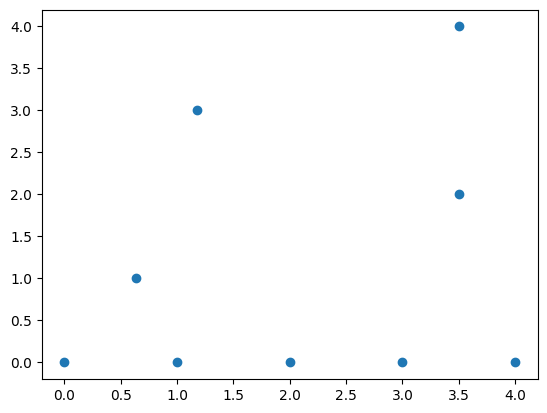

In [33]:
times = []
locs = []
for node in locations:
    times.append(ts.node(node).time)
    locs.append(locations[node])
plt.scatter(locs, times)
plt.show()

In [63]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(time=1, flags=0)  # Node 4
node_table.add_row(time=2, flags=0)  # Node 5
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 6
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 7
node_table.add_row(time=4, flags=0)  # Node 8

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=4, child=0)
edge_table.add_row(left=0, right=1e3, parent=4, child=1)
edge_table.add_row(left=0, right=1e3, parent=5, child=2)
edge_table.add_row(left=0, right=1e3, parent=5, child=4)
edge_table.add_row(left=0, right=500, parent=6, child=3)
edge_table.add_row(left=500, right=1e3, parent=7, child=3)
edge_table.add_row(left=0, right=1e3, parent=8, child=6)
edge_table.add_row(left=0, right=500, parent=8, child=7)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3]}

viz.D3ARG(ts=ts).draw(edge_type="ortho")

In [64]:
dispersal_rate, cov_mat, paths, locations, variances = sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations, return_ancestral_node_positions=[0,1,2,3,4,5,6,7,8])
                                                                   
                                                                   
                                                                   

In [65]:
dispersal_rate

array([[0.571428571428571]], dtype=object)

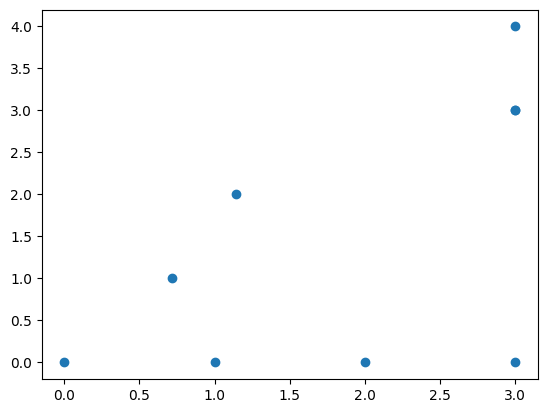

In [67]:
times = []
locs = []
for node in locations:
    times.append(ts.node(node).time)
    locs.append(locations[node])
plt.scatter(locs, times)
plt.show()

In [77]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(time=1, flags=0)  # Node 4
node_table.add_row(time=2, flags=0)  # Node 5
node_table.add_row(time=4, flags=0)  # Node 6

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=4, child=0)
edge_table.add_row(left=0, right=1e3, parent=4, child=1)
edge_table.add_row(left=0, right=1e3, parent=5, child=2)
edge_table.add_row(left=0, right=1e3, parent=5, child=4)
edge_table.add_row(left=0, right=1e3, parent=6, child=3)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3]}

viz.D3ARG(ts=ts).draw(edge_type="ortho")

In [78]:
dispersal_rate, cov_mat, paths, locations, variances = sparg.estimate_spatial_parameters(ts=ts, locations_of_individuals=node_locations, return_ancestral_node_positions=[0,1,2,3,4,5,6,7,8])


In [79]:
dispersal_rate

array([[0.571428571428571]], dtype=object)

In [80]:
ts_left_tree = ts.subset(nodes=[0,1,2,4,5])
viz.D3ARG(ts=ts_left_tree).draw()

In [81]:
dispersal_rate, cov_mat, paths, locations, variances = sparg.estimate_spatial_parameters(ts=ts_left_tree, locations_of_individuals=node_locations, return_ancestral_node_positions=[0,1,2,3,4])

In [82]:
dispersal_rate

array([[0.571428571428571]], dtype=object)

# Chopping the SLiM Simulation

In [24]:
ts = tskit.load("QE/slim/slim_0.25rep1sigma.trees")
np.random.seed(4)
keep_nodes = list(np.random.choice(ts.samples(), 5, replace=False))
ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)

In [25]:
ts_chopped = ts_filtered.decapitate(9000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

In [9]:
outfile = open("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_5_seqlen_4_chopped_2000.txt", "w")
i = 0
for bp in ts_chopped_attached.breakpoints():
    if i < 20:
        if i > 0:
            ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
            ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
            ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
            ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
            dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
            print("Number of trees:", ts_short_attached.num_trees)
            print("Sequence length:", int(bp))
            print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            viz.D3ARG(ts=ts_short_attached).draw()
    else:
        break
    i += 1
outfile.close()

Number of trees: 1
Sequence length: 1794
Dispersal Rates: 0.0947240522092917 0.255347010708648


Number of trees: 2
Sequence length: 4667
Dispersal Rates: 0.0947371086797738 0.255347435155098


Number of trees: 3
Sequence length: 8367
Dispersal Rates: 0.0947371086797760 0.255347435155092


Number of trees: 4
Sequence length: 13749
Dispersal Rates: 0.0949886208852762 0.256947641125490


Number of trees: 5
Sequence length: 15671
Dispersal Rates: 0.0949886208852724 0.256947641125490


Number of trees: 6
Sequence length: 17350
Dispersal Rates: 0.179057849063037 0.394143066589726


Number of trees: 7
Sequence length: 18676
Dispersal Rates: 0.953647871394206 0.458277061950555


Number of trees: 8
Sequence length: 18956
Dispersal Rates: 1.00672449354014 0.458368268519694


Number of trees: 9
Sequence length: 19715
Dispersal Rates: 1.00710142981079 0.458368916244863


Number of trees: 10
Sequence length: 20792
Dispersal Rates: 1.00763828111630 0.460281379842829


Number of trees: 11
Sequence length: 21950
Dispersal Rates: 1.00764148487221 0.460292792810399


Number of trees: 12
Sequence length: 26452
Dispersal Rates: 1.00906723251506 0.460295384590957


Number of trees: 13
Sequence length: 26847
Dispersal Rates: 1.00907366368667 0.460318219255821


Number of trees: 14
Sequence length: 29557
Dispersal Rates: 2.01814732737335 0.920636438511487


Number of trees: 15
Sequence length: 32236
Dispersal Rates: zoo zoo


Number of trees: 16
Sequence length: 34720
Dispersal Rates: zoo zoo


Number of trees: 17
Sequence length: 47192
Dispersal Rates: zoo zoo


Number of trees: 18
Sequence length: 48568
Dispersal Rates: zoo zoo


Number of trees: 19
Sequence length: 55610
Dispersal Rates: -2.01868440226555 -0.920636642641515


In [34]:
ts = tskit.load("QE/slim/slim_0.25rep1sigma.trees")
np.random.seed(4)
keep_nodes = list(np.random.choice(ts.samples(), 5, replace=False))

ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)

ts_chopped = ts_filtered.decapitate(9000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,list(ts_chopped_attached.breakpoints())[15])], simplify=False).trim()            
ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
print("Number of trees:", ts_short_attached.num_trees)
print("Sequence length:", int(bp))
print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
viz.D3ARG(ts=ts_short_attached).draw()








keep_nodes_3 = [keep_nodes[0], keep_nodes[1], keep_nodes[3]]
ts_sim, sim_map = ts.simplify(samples=keep_nodes_3, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)

ts_chopped = ts_filtered.decapitate(9000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,32236)], simplify=False).trim()            
ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
print("Number of trees:", ts_short_attached.num_trees)
print("Sequence length:", int(bp))
print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
viz.D3ARG(ts=ts_short_attached).draw()

keep_nodes_3 = [keep_nodes[0], keep_nodes[1], keep_nodes[3]]
ts_sim, sim_map = ts.simplify(samples=keep_nodes_3, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)

ts_chopped = ts_filtered.decapitate(9000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,29500)], simplify=False).trim()            
ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
print("Number of trees:", ts_short_attached.num_trees)
print("Sequence length:", int(bp))
print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
viz.D3ARG(ts=ts_short_attached).draw()

Number of trees: 15
Sequence length: 26452
Dispersal Rates: zoo zoo


Number of trees: 11
Sequence length: 26452
Dispersal Rates: -1.95375532917682 -0.138353343780306


Number of trees: 10
Sequence length: 26452
Dispersal Rates: zoo zoo


# Extras

In [10]:
ts = tskit.load("QE/slim/slim_0.25rep1sigma.trees")

np.random.seed(4)
keep_nodes = list(np.random.choice(ts.samples(), 20, replace=False))
ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
ts_chopped = ts_filtered.decapitate(4000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

i = 0
for bp in ts_chopped_attached.breakpoints():
    if i < 20:
        if i > 0:
            ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
            ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
            ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
            ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
            dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
            print(i)
            print("Number of trees:", ts_short_attached.num_trees)
            print("Sequence length:", int(bp))
            print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            print()
            if i == 15:
                viz.D3ARG(ts=ts_short_attached).draw()
    else:
        break
    i += 1

1
Number of trees: 1
Sequence length: 1459
Dispersal Rates: 0.550203481182387 0.199553242711646

2
Number of trees: 2
Sequence length: 1794
Dispersal Rates: 3.06079732072877 0.199910396794136

3
Number of trees: 3
Sequence length: 4387
Dispersal Rates: 0.550203634172551 0.199703611131527

4
Number of trees: 4
Sequence length: 5510
Dispersal Rates: 0.585702632466032 0.200248048500558

5
Number of trees: 5
Sequence length: 5744
Dispersal Rates: 0.585718215738315 0.200835407194451

6
Number of trees: 6
Sequence length: 6280
Dispersal Rates: 0.585718215738314 0.200835407194451

7
Number of trees: 7
Sequence length: 8367
Dispersal Rates: 0.587721219992781 0.226292354412694

8
Number of trees: 8
Sequence length: 8394
Dispersal Rates: 0.595395324909184 0.226420794923422

9
Number of trees: 9
Sequence length: 9454
Dispersal Rates: 0.649522172628202 0.247004503552824

10
Number of trees: 10
Sequence length: 12116
Dispersal Rates: 0.649523432049268 0.247020510016886

11
Number of trees: 11
Seque

16
Number of trees: 15
Sequence length: 18956
Dispersal Rates: 0.775144721304354 0.295212133855084

17
Number of trees: 16
Sequence length: 19715
Dispersal Rates: 0.775215998878139 0.295230943432551

18
Number of trees: 17
Sequence length: 21606
Dispersal Rates: 0.775217018863774 0.295828430592089

19
Number of trees: 18
Sequence length: 21950
Dispersal Rates: 0.861352243181973 0.328698256213433



# Small Graham Example

In [35]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(time=1, flags=0)  # Node 4
node_table.add_row(time=2, flags=0)  # Node 5
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 6
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 7
node_table.add_row(time=4, flags=0)  # Node 8
node_table.add_row(time=8, flags=0)  # Node 9

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=4, child=0)
edge_table.add_row(left=0, right=1e3, parent=4, child=1)
edge_table.add_row(left=0, right=1e3, parent=5, child=2)
edge_table.add_row(left=0, right=1e3, parent=5, child=4)
edge_table.add_row(left=0, right=500, parent=6, child=3)
edge_table.add_row(left=500, right=1e3, parent=7, child=3)
edge_table.add_row(left=0, right=1e3, parent=8, child=5)
edge_table.add_row(left=0, right=500, parent=8, child=6)
edge_table.add_row(left=500, right=1e3, parent=9, child=7)
edge_table.add_row(left=500, right=1e3, parent=9, child=8)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3]}

viz.D3ARG(ts=ts).draw(edge_type="ortho")

In [36]:
ts_chopped = ts.decapitate(6)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)
dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_chopped_attached, locations_of_individuals=node_locations)
viz.D3ARG(ts=ts_chopped_attached).draw()
print("Dispersal Rate:", dispersal_rate)

Dispersal Rate: [[0.822916666666667]]


In [53]:
tables = tskit.TableCollection(sequence_length=1e3)

individuals_table = tables.individuals
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()
individuals_table.add_row()

node_table = tables.nodes
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=0)  # Node 0
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=1)  # Node 1
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=2)  # Node 2
node_table.add_row(flags=tskit.NODE_IS_SAMPLE, individual=3)  # Node 3
node_table.add_row(time=1, flags=0)  # Node 4
node_table.add_row(time=2, flags=0)  # Node 5
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 6
node_table.add_row(time=3, flags=msprime.NODE_IS_RE_EVENT)  # Node 7
node_table.add_row(time=4, flags=0)  # Node 8
node_table.add_row(time=5, flags=msprime.NODE_IS_RE_EVENT)  # Node 9
node_table.add_row(time=5, flags=msprime.NODE_IS_RE_EVENT)  # Node 10
node_table.add_row(time=7, flags=0)  # Node 11
node_table.add_row(time=8, flags=0)  # Node 12

edge_table = tables.edges
edge_table.add_row(left=0, right=1e3, parent=4, child=0)
edge_table.add_row(left=0, right=1e3, parent=4, child=1)
edge_table.add_row(left=0, right=1e3, parent=5, child=2)
edge_table.add_row(left=0, right=1e3, parent=5, child=4)
edge_table.add_row(left=0, right=500, parent=6, child=3)
edge_table.add_row(left=500, right=1e3, parent=7, child=3)
edge_table.add_row(left=0, right=1e3, parent=8, child=5)
edge_table.add_row(left=0, right=500, parent=8, child=6)
edge_table.add_row(left=500, right=750, parent=9, child=7)
edge_table.add_row(left=750, right=1e3, parent=10, child=7)
edge_table.add_row(left=500, right=750, parent=11, child=9)
edge_table.add_row(left=750, right=1e3, parent=11, child=10)
edge_table.add_row(left=500, right=1e3, parent=12, child=8)
edge_table.add_row(left=500, right=1e3, parent=12, child=11)

ts = tables.tree_sequence()

node_locations = {0:[0], 1:[1], 2:[2], 3:[3]}

viz.D3ARG(ts=ts).draw(edge_type="ortho")

In [54]:
ts_chopped = ts.decapitate(6)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)
dispersal_rate, cov_mat, paths, locations, variances = sparg.estimate_spatial_parameters(ts=ts_chopped_attached, locations_of_individuals=node_locations, return_ancestral_node_positions=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
viz.D3ARG(ts=ts_chopped_attached).draw()
print("Dispersal Rate:", dispersal_rate)

Dispersal Rate: [[1.64583333333333]]


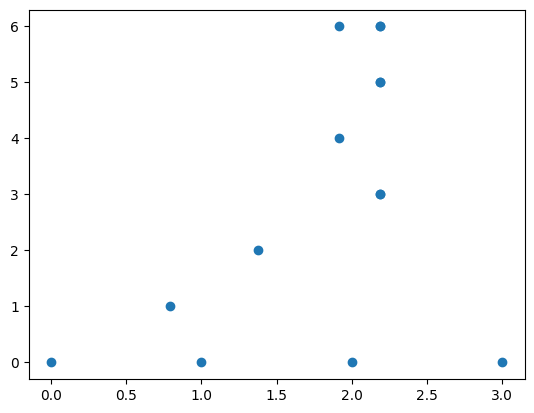

In [55]:
times = []
locs = []
for node in locations:
    times.append(ts_chopped_attached.node(node).time)
    locs.append(locations[node])
plt.scatter(locs, times)
plt.show()

In [56]:
locs

[[8.88178419700125e-16],
 [1.00000000000000],
 [2.00000000000000],
 [3.00000000000000],
 [0.791666666666667],
 [1.37500000000000],
 [2.18750000000000],
 [2.18750000000000],
 [1.91666666666667],
 [2.18750000000000],
 [2.18750000000000],
 [2.18750000000000],
 [2.18750000000000],
 [1.91666666666667]]

In [58]:
23/12

1.9166666666666667

In [52]:
ts = tskit.load("QE/slim/slim_0.25rep1sigma.trees")

np.random.seed(3)
keep_nodes = list(np.random.choice(ts.samples(), 100, replace=False))
ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
ts_chopped = ts_filtered.decapitate(4000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

outfile = open("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_3_chopped_4000.txt", "w")
i = 0
for bp in ts_chopped_attached.breakpoints():
    if i < 20:
        if i > 0:
            ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
            ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
            ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
            ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
            dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
            outfile.write(str(ts_short_attached.num_trees) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(len(paths)) + "\n")
            print("Number of trees:", ts_short_attached.num_trees)
            print("Sequence length:", int(bp))
            print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            #if ts_short_attached.num_trees == 2:
            #    viz.D3ARG(ts=ts_short_attached).draw()
    else:
        break
    i += 1
outfile.close()

Number of trees: 1
Sequence length: 1674
Dispersal Rates: 0.349015263706192 0.277933922747812
Number of trees: 2
Sequence length: 1794
Dispersal Rates: 0.351899696778462 0.279914546042528
Number of trees: 3
Sequence length: 3966
Dispersal Rates: 0.351899696778464 0.279914546042531
Number of trees: 4
Sequence length: 5744
Dispersal Rates: 0.355991553717745 0.283169366345351
Number of trees: 5
Sequence length: 6280
Dispersal Rates: 0.355991553717744 0.283169366345345
Number of trees: 6
Sequence length: 7383
Dispersal Rates: 0.358887415109924 0.285174985246413
Number of trees: 7
Sequence length: 8367
Dispersal Rates: 0.363109619993567 0.288529985072843
Number of trees: 8
Sequence length: 9982
Dispersal Rates: 0.364790934395331 0.288551414599967
Number of trees: 9
Sequence length: 9990
Dispersal Rates: 0.364792734314214 0.288552679025150
Number of trees: 10
Sequence length: 12057
Dispersal Rates: 0.364797152993770 0.288572932196678
Number of trees: 11
Sequence length: 12116
Dispersal Rates

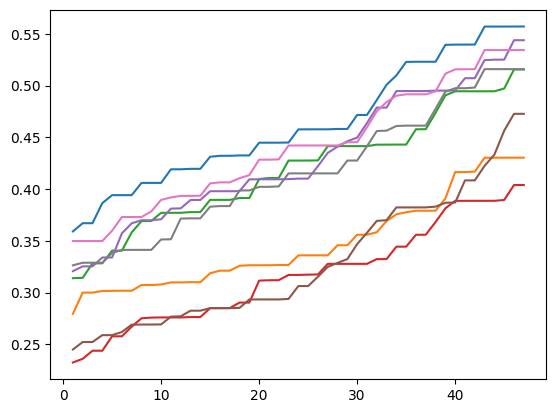

In [50]:
dispersal_1 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_1_chopped_4000.txt")
plt.plot(dispersal_1[:,0], dispersal_1[:,2])
plt.plot(dispersal_1[:,0], dispersal_1[:,3])
dispersal_2 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_2_chopped_4000.txt")
plt.plot(dispersal_2[:,0], dispersal_2[:,2])
plt.plot(dispersal_2[:,0], dispersal_2[:,3])
dispersal_3 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_3_chopped_4000.txt")
plt.plot(dispersal_3[:,0], dispersal_3[:,2])
plt.plot(dispersal_3[:,0], dispersal_3[:,3])
dispersal_4 = np.loadtxt("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_50_seqlen_4_chopped_4000.txt")
plt.plot(dispersal_4[:,0], dispersal_4[:,2])
plt.plot(dispersal_4[:,0], dispersal_4[:,3])
plt.show()

In [ ]:
ts = tskit.load("QE/slim/slim_0.25rep1sigma.trees")

np.random.seed(3)
keep_nodes = list(np.random.choice(ts.samples(), 5, replace=False))
ts_sim, sim_map = ts.simplify(samples=keep_nodes, keep_input_roots=False, keep_unary=True, map_nodes=True)
ts_filtered, filtered_maps, filtered_critical = sparg.remove_excess_nodes(ts=ts_sim)
ts_chopped = ts_filtered.decapitate(4000)
ts_chopped_attached, maps_chopped_attached = sparg.remove_unattached_nodes(ts=ts_chopped)

outfile = open("QE/slim/slim_0.25rep1sigma_dispersalrateestimates_100_seqlen_3_chopped_4000.txt", "w")
i = 0
for bp in ts_chopped_attached.breakpoints():
    if i < 20:
        if i > 0:
            ts_short = ts_chopped_attached.keep_intervals(intervals=[(0,bp)], simplify=False).trim()
            ts_short_sim, maps_short_sim = sparg.new_remove_useless_nodes(ts=ts_short)
            ts_short_merged = sparg.merge_unnecessary_roots(ts=ts_short_sim)
            ts_short_attached, maps_short_attached = sparg.remove_unattached_nodes(ts=ts_short_merged)
            dispersal_rate, cov_mat, paths = sparg.estimate_spatial_parameters(ts=ts_short_attached)
            outfile.write(str(ts_short_attached.num_trees) + " " + str(bp) + " " + str(dispersal_rate[0][0]) + " " + str(dispersal_rate[1][1]) + " " + str(len(paths)) + "\n")
            print("Number of trees:", ts_short_attached.num_trees)
            print("Sequence length:", int(bp))
            print("Dispersal Rates:", dispersal_rate[0][0], dispersal_rate[1][1])
            #if ts_short_attached.num_trees == 2:
            #    viz.D3ARG(ts=ts_short_attached).draw()
    else:
        break
    i += 1
outfile.close()